In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.optimizers import gradient_descent_v2
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 3

In [ ]:
# Load a dataset.
cozinha_dataset_path_1 = "gdrive/MyDrive/Mestrado/dataset_objetos_cozinha_melhorado"

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_1,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 3 classes.
Using 351 files for training.


In [ ]:
val_ds_1 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_1,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 3 classes.
Using 117 files for validation.


In [ ]:
class_names_1 = train_ds_1.class_names
print(class_names_1)

['Copos', 'Pratos', 'Talheres']


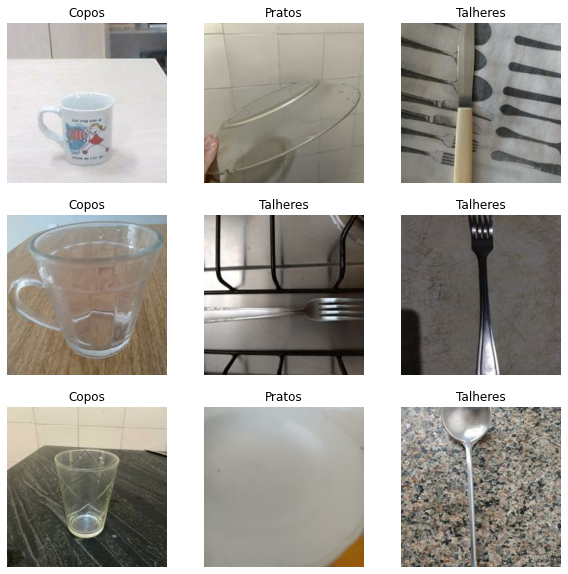

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_1[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilando o modelo
epocas = 100

sgd = gradient_descent_v2.SGD(learning_rate=lrate)

model.compile(
    optimizer=sgd,
    loss="SparseCategoricalCrossentropy",
    metrics=["accuracy"],
)
print(model.summary())

# Treinando o modelo
history = model.fit(
    train_ds_1, epochs=epocas, validation_data=val_ds_1, batch_size=32
)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 224, 3)        64544     
                                                                 
 batch_normalization_64 (Bat  (None, 32, 224, 3)       12        
 chNormalization)                                                
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 32, 112, 1)       0         
 g2D)                                                            
                                                                 
 dropout_55 (Dropout)        (None, 32, 112, 1)        0         
                                                                 
 conv2d_65 (Conv2D)          (None, 64, 112, 1)        18496     
                                                                 
 batch_normalization_65 (Bat  (None, 64, 112, 1)     

# 5

In [ ]:
# Load a dataset.
cozinha_dataset_path_2 = "gdrive/MyDrive/Mestrado/dataset_objetos_cozinha"

In [ ]:
img_height,img_width=224,224
batch_size=32
train_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_2,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 5 classes.
Using 351 files for training.


In [ ]:
val_ds_2 = tf.keras.preprocessing.image_dataset_from_directory(
  cozinha_dataset_path_2,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 468 files belonging to 5 classes.
Using 117 files for validation.


In [ ]:
class_names_2 = train_ds_2.class_names
print(class_names_2)

['Colheres', 'Copos', 'Facas', 'Garfos', 'Pratos']


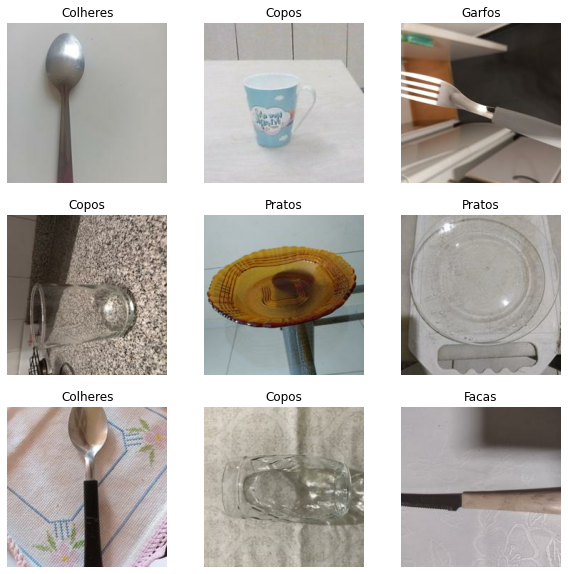

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_2[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(filters=512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compilando o modelo
epocas = 100

model.compile(
    optimizer="adam",
    loss="SparseCategoricalCrossentropy",
    metrics=["accuracy"],
)

# Treinando o modelo
history = model.fit(
    train_ds_2, epochs=epocas, validation_data=val_ds_2, batch_size=32
)

Epoch 1/100
11/11 [==============================] - 2s 66ms/step - loss: 6.5589 - accuracy: 0.2080 - val_loss: 1.6587 - val_accuracy: 0.2222
Epoch 2/100
11/11 [==============================] - 1s 48ms/step - loss: 1.7920 - accuracy: 0.2678 - val_loss: 1.6443 - val_accuracy: 0.2564
Epoch 3/100
11/11 [==============================] - 1s 48ms/step - loss: 1.7110 - accuracy: 0.2735 - val_loss: 1.6306 - val_accuracy: 0.2308
Epoch 4/100
11/11 [==============================] - 1s 50ms/step - loss: 1.6351 - accuracy: 0.3419 - val_loss: 1.5960 - val_accuracy: 0.2735
Epoch 5/100
11/11 [==============================] - 1s 50ms/step - loss: 1.5780 - accuracy: 0.2991 - val_loss: 1.6005 - val_accuracy: 0.2479
Epoch 6/100
11/11 [==============================] - 1s 47ms/step - loss: 1.5842 - accuracy: 0.3219 - val_loss: 1.5978 - val_accuracy: 0.2564
Epoch 7/100
11/11 [==============================] - 1s 47ms/step - loss: 1.5372 - accuracy: 0.3447 - val_loss: 1.6217 - val_accuracy: 0.1966
Epoch 

In [ ]:
from PIL import Image as im

def predict_image_1(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names_1[i]: float(prediction[i]) for i in range(len(class_names_1))}

def predict_image_2(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names_2[i]: float(prediction[i]) for i in range(len(class_names_2))}

In [ ]:
demo = gr.Blocks()

with demo:
    gr.Markdown("Selecione a quantidade de classes")
    with gr.Tabs():
        with gr.TabItem("3 Classes"):
          with gr.Row():
            image_input_1 = gr.inputs.Image(shape=(224,224))
            image_output_1 = gr.outputs.Label(num_top_classes=3)
            image_button_1 = gr.Button("Carregar")
        with gr.TabItem("5 Classes"):
          with gr.Row():
            image_input_2 = gr.inputs.Image(shape=(224,224))
            image_output_2 = gr.outputs.Label(num_top_classes=5)
            image_button_2 = gr.Button("Carregar")

    image_button_1.click(predict_image_1, inputs=image_input_1, outputs=image_output_1)
    image_button_2.click(predict_image_2, inputs=image_input_2, outputs=image_output_2)

demo.launch(debug='true')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://13304.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
